# PROJECT : INVESMENT MANGEMENT ANALYSIS

Suppose 'AAA', an asset management company. 'AAA' wants to make investments in a few companies. 
The CEO of 'AAA' wants to understand the global trends in investments so that he can take the investment decisions effectively.

##### In this project there will be no algorithm will be applied.This is mainly a analytical project and it can be done with different analysis ans visualization on dataset.

In [1]:
#Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the datasets.
rounds = pd.read_csv('rounds2.csv' , encoding = "ISO-8859-1")
company = pd.read_csv('companies.txt' , sep = '\t' , encoding = "ISO-8859-1")

In [3]:
rounds.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [4]:
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [5]:
rounds.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [6]:
company.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [7]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [8]:
company.head(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/Organization/1-2-3-Listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


In [9]:
print('Round dataset shape: ' , rounds.shape)
print('Company dataset shape: ' , company.shape)

Round dataset shape:  (114949, 6)
Company dataset shape:  (66368, 10)


Both the dataset have a common column PERMALINK .So based on that column add the both dataset.

But at first check both the column have the samne number of unique value.

In [10]:
# identify the unique number of permalinks in companies
len(company.permalink.unique())

66368

In [11]:
len(rounds.company_permalink.unique())

90247

## Data Cleaning

In [12]:
# convert the entry to lower
company['permalink'] = company['permalink'].str.lower()
company.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [13]:
len(company.permalink.unique())

66368

Thus, there are 66368 unique companies in the table and ```permalink``` is the unique primary key. Each row represents a unique company.

Let's now check whether all of these 66368 companies are present in the rounds file, and if some extra ones are present.

In [14]:
len(rounds.company_permalink.unique())

90247

Thus, there are 90247 unique values```company permalink``` .We expect 66368. So there may be some uppercase or lowercase problem.

Convert to lowercase.

In [15]:
# converting column to lowercase
rounds['company_permalink'] = rounds['company_permalink'].str.lower()
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [16]:
len(rounds.company_permalink.unique())

66370

There still 2 missing value company dataset.

In [17]:
# companies present in rounds file but not in (~) companies file
rounds.loc[~rounds['company_permalink'].isin(company['permalink']) , :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


In [18]:
# looking at the indices with weird characters
rounds_original = pd.read_csv('rounds2.csv' , encoding = 'ISO-8859-1')
rounds_original.iloc[[29597 , 31863 , 45176 , 58473 , 101036 , 109969 , 113829] , :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇµÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/ORGANIZATION/WEICHE-TECH-ÅÈ½¦Ç§Æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113829,/ORGANIZATION/ZENDYHEALTH,/funding-round/64b827f491bf661d95b53c021ae3480d,angel,NaN,01-06-2014,1000000.0


The company weird characters appear when you import the data file. To confirm whether these characters are actually present in the given data or whether python has introduced them while importing into pandas, let's have a look at the original CSV file in Excel.

Thus, this is most likely a data quality issue we have introduced while reading the data file into python. Specifically, this is most likely caused because of encoding.

First, let's try to figure out the encoding type of this file. Then we can try specifying the encoding type at the time of reading the file. The ```chardet``` library shows the encoding type of a file.

In [19]:
import chardet

rawdata = open('rounds2.csv' , 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

Windows-1254


In [20]:
print(result)

{'encoding': 'Windows-1254', 'confidence': 0.4186155476629225, 'language': 'Turkish'}


In [21]:
# trying different encodings
# encoding="cp1254" throws an error
#rounds_original = pd.read_csv("rounds2.csv", encoding = 'Windows-1254')
#rounds_original.iloc[[29597, 31863, 45176], :]

find the best encoding also not work on the rounds dataset.

In [22]:
rounds['company_permalink'] = rounds.company_permalink.str.encode('utf-8').str.decode('ascii' , 'ignore')
rounds.loc[~rounds['company_permalink'].isin(company['permalink']) , :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
77,/organization/10north,/funding-round/b41ff7de932f8b6e5bbeed3966c0ed6a,equity_crowdfunding,NaN,12-08-2014,NaN
729,/organization/51wofang-,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.0
2670,/organization/adslinked,/funding-round/449ae54bb63c768c232955ca6911dee4,seed,NaN,29-09-2014,100000.0
3166,/organization/aesthetic-everything-social-network,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,NaN,12-10-2014,NaN
3291,/organization/affluent-attach-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15-10-2014,100000.0
4568,/organization/allgu-outlet,/funding-round/49e8a9b54ed19c8505ca92dc031a8e9c,venture,NaN,17-03-2015,1400000.0
8097,/organization/asiansbook,/funding-round/3f243ab92b4fe397d41b4734a17ca5f0,seed,NaN,15-09-2014,100000.0
8652,/organization/atlye-gri,/funding-round/75bdeacd95a647108aa4bc480e77894d,grant,NaN,01-11-2012,13940.0
9784,/organization/axgaz,/funding-round/511a41181aaf193bbd419babfb8d66e9,venture,NaN,06-07-2015,4094392.0
14311,/organization/boral-bikes-incorporated,/funding-round/be79575bf4b5b5d6fa64670800a3ca5e,seed,NaN,26-02-2015,NaN


This a tecnique found in stack overflow,the tecnique is at first encode the column with 'utf-8' then again decode it with 'ascii'


Now look at the dataframe again.

In [23]:
len(rounds.company_permalink.unique())

66368

Now there are 66368 unique companies in both the ```rounds``` and ```companies``` dataframes. 

It can be possible that the similar problem in company dataset also.So check it.

In [24]:
company.loc[~company['permalink'].isin(rounds['company_permalink']), :]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
43,/organization/10â°north,10Â°North,NaN,Fashion,operating,CAN,ON,Toronto,Mississauga,05-01-2013
426,/organization/51wofang-æ å¿§ææ¿,51wofang æ å¿§ææ¿,http://www.51wofang.com,NaN,closed,NaN,NaN,NaN,NaN,01-01-2014
1506,/organization/adslinkedâ¢,AdsLinkedâ¢,http://www.adslinked.com,Advertising|Internet,operating,NaN,NaN,NaN,NaN,NaN
1775,/organization/aesthetic-everythingâ®-social-ne...,Aesthetic EverythingÂ® Social Network,http://aestheticeverything.com/,Public Relations,operating,USA,CA,Los Angeles,Marina Del Rey,15-06-2009
1834,/organization/affluent-attachã©-club-2,Affluent AttachÃ© Club,http://www.affluentattache.com/,Hospitality,operating,USA,CA,Los Angeles,Beverly Hills,NaN
2556,/organization/allgã¤u-outlet,AllgÃ¤u Outlet,http://allgaeuoutlet.de/,Fashion,operating,DEU,2,DEU - Other,Sonthofen,NaN
4567,/organization/asiansbookâ¢,Asiansbookâ¢,http://www.asiansbook.com,Social Media|Social Network Media,operating,NaN,NaN,NaN,NaN,NaN
4903,/organization/atã¶lye-gri,AtÃ¶lye Gri,http://www.atolyegri.com/,Advertising,operating,NaN,NaN,NaN,NaN,NaN
5490,/organization/axã¨gaz,AxÃ¨gaz,http://www.axegaz.com/,Energy,operating,FRA,A8,Paris,Levallois-perret,01-01-2012
8131,/organization/borã©al-bikes-incorporated,BorÃ©al Bikes Incorporated,http://www.borealbikes.com,Automotive|Design|Manufacturing,operating,DEU,16,Berlin,Berlin,01-01-2014


In company there is also some special character present.So apply the same method in company column also.

In [25]:
company['permalink'] = company.permalink.str.encode('utf-8').str.decode('ascii' , 'ignore')
company.loc[~company['permalink'].isin(rounds['company_permalink']) , :]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


Everything is clean form the dataset.Now save the clean dataset in a new csv file.

In [26]:
rounds.to_csv("rounds_new.csv", sep=',', index=False)

company.to_csv("company_new.csv", sep='\t', index=False)

1st part of data cleaning is over.Now the second part will deal with the missing values.

## Work with Missing values.

In [27]:
rounds = pd.read_csv("rounds_new.csv", encoding = "ISO-8859-1")
company = pd.read_csv("company_new.csv", sep="\t", encoding = "ISO-8859-1")

In [28]:
print(len(company.permalink.unique()))
print(len(rounds.company_permalink.unique()))

66368
66368


In [29]:
print('No of not matched value: ',len(rounds.loc[~rounds['company_permalink'].isin(company['permalink']), :]))

No of not matched value:  0


In [30]:
company.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [31]:
rounds.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [32]:
# Merge the two dataset.
master = pd.merge(company , rounds , how="inner" , left_on="permalink" , right_on = "company_permalink")
master.head(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [33]:
master.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [34]:
master.shape

(114949, 16)

In [35]:
master = master.drop(['company_permalink'] , axis = 1)

In [36]:
master.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'funding_round_permalink', 'funding_round_type', 'funding_round_code',
       'funded_at', 'raised_amount_usd'],
      dtype='object')

In [37]:
# summing up the missing values and displaying fraction of NaNs
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

From the above percentage it is clear that funding_round_code have around 73% missing value and this columns is not so useful.There are others column which are not so useful for our work.So we remove it.

In [38]:
# dropping columns 
master = master.drop(['homepage_url', 'state_code', 'region', 'city', 'founded_at', 'funding_round_code'], axis=1)
master.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [39]:
round(100*(master.isnull().sum()/len(master.index)) , 2)

permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

Though raised_amount_usd have 17% missing value but we cannot delete it because it is our main target column.

We have deal with the missing values or delete those rows.

In [40]:
# summary stats of raised_amount_usd
master['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

The mean is somewhere around USD 10 million, while the median is only about USD 1m. The min and max values are also miles apart. 

In general, since there is a huge spread in the funding amounts, it will be inappropriate to impute it with a metric such as median or mean. Also, since we have quite a large number of observations, it is wiser to just drop the rows. 

In [41]:
# removing NaNs in raised_amount_usd
master = master[~np.isnan(master['raised_amount_usd'])]

In [42]:
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

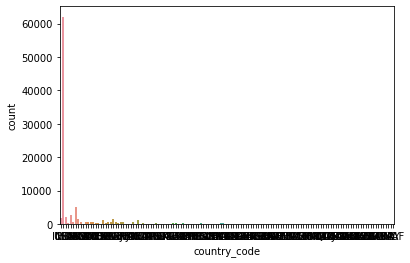

In [43]:
sns.countplot(x = 'country_code' , data = master)

In [44]:
country_codes = master['country_code'].astype('category')

# displaying frequencies of each category
country_codes.value_counts()

USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
FRA     1451
ISR     1364
ESP     1074
DEU     1042
AUS      649
RUS      588
IRL      563
SWE      560
SGP      546
NLD      532
JPN      485
ITA      483
BRA      483
CHE      437
KOR      432
CHL      432
FIN      382
DNK      314
ARG      297
BEL      293
HKG      250
TUR      196
NOR      191
BGR      190
MEX      189
       ...  
KHM        2
DOM        2
MAR        2
MAF        2
KWT        2
NIC        2
ZMB        2
KAZ        2
TUN        2
SOM        1
SYC        1
SEN        1
TGO        1
QAT        1
UZB        1
PSE        1
PRY        1
OMN        1
DMA        1
BLM        1
MNE        1
MKD        1
BRB        1
LAO        1
IRN        1
HND        1
GRD        1
GGY        1
DZA        1
KNA        1
Name: country_code, Length: 134, dtype: int64

In [45]:
# viewing fractions of counts of country_codes
100*(master['country_code'].value_counts()/len(master.index))

USA    65.342937
GBR     5.285439
CAN     2.754873
CHN     2.029297
IND     1.736539
FRA     1.528028
ISR     1.436409
ESP     1.131014
DEU     1.097316
AUS     0.683453
RUS     0.619215
IRL     0.592887
SWE     0.589728
SGP     0.574985
NLD     0.560242
JPN     0.510747
BRA     0.508641
ITA     0.508641
CHE     0.460199
CHL     0.454933
KOR     0.454933
FIN     0.402279
DNK     0.330669
ARG     0.312767
BEL     0.308554
HKG     0.263272
TUR     0.206405
NOR     0.201139
BGR     0.200086
MEX     0.199033
         ...    
ZMB     0.002106
MAF     0.002106
BAH     0.002106
KWT     0.002106
ALB     0.002106
KHM     0.002106
CIV     0.002106
MAR     0.002106
BLZ     0.002106
GRD     0.001053
BRB     0.001053
KNA     0.001053
DMA     0.001053
LAO     0.001053
BLM     0.001053
GGY     0.001053
OMN     0.001053
HND     0.001053
MKD     0.001053
PRY     0.001053
DZA     0.001053
SEN     0.001053
SOM     0.001053
TGO     0.001053
PSE     0.001053
UZB     0.001053
MNE     0.001053
SYC     0.0010

Delete those row which have missing value in COUNTRY_CODE column.

In [46]:
# removing rows with missing country_codes
master = master[~pd.isnull(master['country_code'])]

In [47]:
# look at missing values
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                  0.00
name                       0.00
category_list              0.65
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

Delete those row which have missing value in CATEGORY_LIST column.

In [48]:
# removing rows with missing category_list values
master = master[~pd.isnull(master['category_list'])]

In [49]:
# look at missing values
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [50]:
# writing the clean dataframe to an another file
master.to_csv("master_df.csv", sep=',', index=False)

In [51]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 9 columns):
permalink                  88529 non-null object
name                       88528 non-null object
category_list              88529 non-null object
status                     88529 non-null object
country_code               88529 non-null object
funding_round_permalink    88529 non-null object
funding_round_type         88529 non-null object
funded_at                  88529 non-null object
raised_amount_usd          88529 non-null float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


In [52]:
master.shape

(88529, 9)

In [53]:
100*(len(master.index) / len(rounds.index))

77.01589400516751

#### After missing value treatment around 77% observation are remaining.

## Funding Type Analysis

In [54]:
df = pd.read_csv('master_df.csv' , sep=",", encoding="ISO-8859-1")

In [55]:
df.isnull().sum()

permalink                  0
name                       1
category_list              0
status                     0
country_code               0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
dtype: int64

In [56]:
df.head(10)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
3,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
6,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,3000000.0
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0


In [57]:
# first, let's filter the df so it only contains the four specified funding types
df = df[(df.funding_round_type == 'angel') |
        (df.funding_round_type == 'venture') |
        (df.funding_round_type == 'seed') |
        (df.funding_round_type == 'private_equity')]

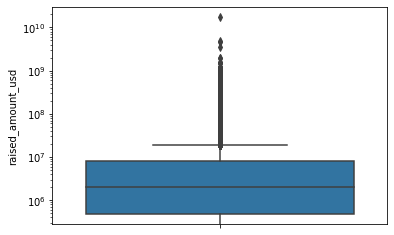

In [58]:
# Distribution of the data in raised_amount_usd
sns.boxplot(y = df['raised_amount_usd'])
plt.yscale('log')
plt.show()

In [59]:
# summary metrics
df['raised_amount_usd'].describe()

count    7.512400e+04
mean     9.519475e+06
std      7.792778e+07
min      0.000000e+00
25%      4.705852e+05
50%      2.000000e+06
75%      8.000000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

There's a significant difference between the mean and the median - USD 9.5m and USD 2m. Let's also compare the summary stats across the four categories.

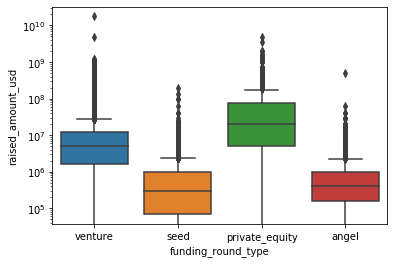

In [60]:
# comparing summary stats across four categories
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=df)
plt.yscale('log')
plt.show()

In [61]:
# compare the mean and median values across categories
df.pivot_table(values = 'raised_amount_usd' , columns = 'funding_round_type' , aggfunc = [np.median , np.mean])

median                                      \
funding_round_type     angel private_equity      seed    venture   
raised_amount_usd   414906.0     20000000.0  300000.0  5000000.0   

                             mean                                              
funding_round_type          angel private_equity           seed       venture  
raised_amount_usd   971573.891136   7.393849e+07  747793.682484  1.172422e+07

Note that there's a large difference between the mean and the median values for all four types. For type venture, for e.g. the median is about 20m while the mean is about 70m. 

Thus, the choice of the summary statistic will drastically affect the decision (of the investment type). Let's choose median, since there are quite a few extreme values pulling the mean up towards them - but they are not the most 'representative' values.



In [62]:
# compare the median investment amount across the types
df.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending = False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               414906.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

In [63]:
# compare the mean investment amount across the types
df.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending = False)

funding_round_type
private_equity    7.393849e+07
venture           1.172422e+07
angel             9.715739e+05
seed              7.477937e+05
Name: raised_amount_usd, dtype: float64

For this time we consider the median value.
Beacuse in median funding_type can be clearly separable but it cannot be possible in mean.

Thus, 'venture' type investment will be most suited to them.

## Country Analysis

Let's now compare the total investment amounts across countries. Note that we'll filter the data for only the 'venture' type investments and then compare the 'total investment' across countries.

In [64]:
# filter the df for private equity type investments
df = df[df.funding_round_type == 'venture']

country_wise_total = df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending = False)
print(country_wise_total)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
SWE    3.145857e+09
NLD    2.903876e+09
CHE    2.801560e+09
SGP    2.793918e+09
ESP    1.827622e+09
BRA    1.785818e+09
IRL    1.669286e+09
RUS    1.570426e+09
AUS    1.319029e+09
DNK    1.228311e+09
FIN    1.043200e+09
BEL    1.030840e+09
NOR    9.536361e+08
KOR    8.919883e+08
MYS    8.830588e+08
HKG    7.812670e+08
TWN    6.239795e+08
AUT    5.833607e+08
TUR    5.590975e+08
ITA    4.882894e+08
NZL    4.483164e+08
           ...     
KWT    1.400000e+07
LIE    1.309172e+07
MNE    1.220000e+07
SVN    1.201751e+07
BGR    1.130000e+07
KAZ    1.100000e+07
GRC    1.074378e+07
BAH    8.900000e+06
TTO    8.500000e+06
SVK    8.241062e+06
BGD    7.002000e+06
LBN    6.455000e+06
GGY    3.960000e+06
TUN    3.920000e+06
SEN    2.860000e+06
HRV    2.633669e+06
UGA    2.500000e+06
PER    2.469270e+06
BWA    

In [65]:
# top 9 countries
top_9_countries = country_wise_total[:9]
top_9_countries

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

In [66]:
# filtering for the top three countries
df = df[(df.country_code=='USA') | (df.country_code=='GBR') | (df.country_code=='IND')]
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0


In [67]:
df.shape

(38803, 9)

After filtering for 'venture' investments and the three countries USA, Great Britain and India, the filtered df looks like this.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 88518
Data columns (total 9 columns):
permalink                  38803 non-null object
name                       38803 non-null object
category_list              38803 non-null object
status                     38803 non-null object
country_code               38803 non-null object
funding_round_permalink    38803 non-null object
funding_round_type         38803 non-null object
funded_at                  38803 non-null object
raised_amount_usd          38803 non-null float64
dtypes: float64(1), object(8)
memory usage: 3.0+ MB


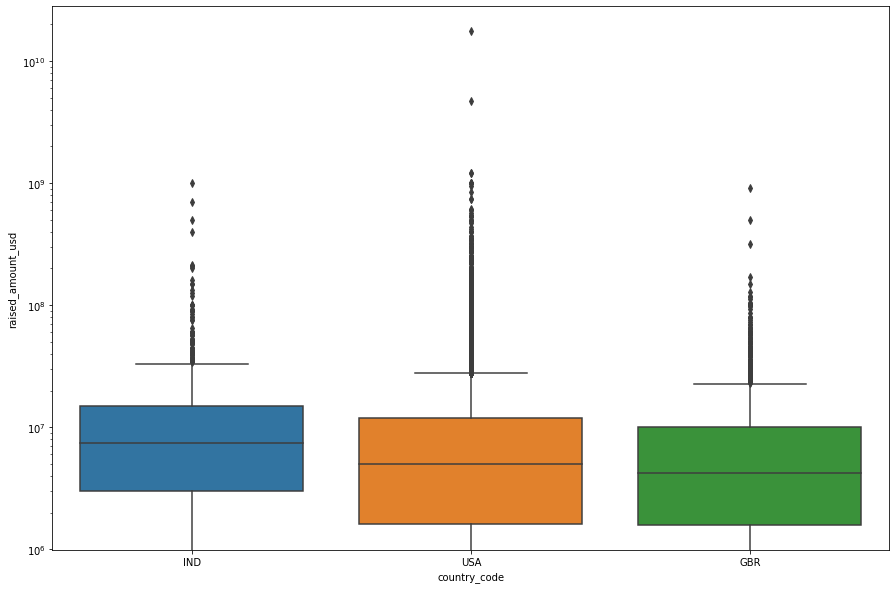

In [69]:
plt.figure(figsize = (15 , 10))
sns.boxplot(x = 'country_code' , y = 'raised_amount_usd' , data = df)
plt.yscale('log')
plt.show()

Now let's analyse the different sectors.

## Sector Analysis

First, we need to extract the main sector using the column ```category_list```. The category_list column contains values such as 'Biotechnology|Health Care' - in this, 'Biotechnology' is the 'main category' of the company, which we need to use.

In [70]:
df.loc[: , 'main_catrgory'] = df['category_list'].apply(lambda x: x.split('|')[0])
df.head(10)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_catrgory
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps
21,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,Education
25,/organization/1000memories,1000memories,Curated Web,acquired,USA,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0,Curated Web
29,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,265940.0,Curated Web
30,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/funding-round/6aeb32ab3fc05db2b606d7a2466e8c09,venture,15-01-2014,2906832.0,Curated Web
31,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/funding-round/89317984885b44f02e4befb9dc2e588c,venture,01-08-2014,1500000.0,Curated Web


In [71]:
# drop category_list
df = df.drop(['category_list'] , axis = 1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_catrgory
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
15,/organization/1-mainstream,1 Mainstream,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps


Now read the mapping csv file and merge them with the main.

In [72]:
# read mapping file
mapping = pd.read_csv('mapping.csv' , sep=',')
mapping.head(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [73]:
mapping.shape

(688, 10)

In [74]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [75]:
# remove missing value row
mapping = mapping[~pd.isnull(mapping['category_list'])]
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [76]:
# converting common columns to lowercase
mapping['category_list'] = mapping['category_list'].str.lower()
df['main_catrgory'] = df['main_catrgory'].str.lower()

In [77]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,0,1,0,0,0,0


In [78]:
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_catrgory
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics
15,/organization/1-mainstream,1 Mainstream,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,apps


In [79]:
mapping['category_list']

1                                      3d
2                             3d printing
3                           3d technology
4                              accounting
5                        active lifestyle
6                            ad targeting
7                      advanced materials
8                        adventure travel
9                             advertising
10                  advertising exchanges
11                   advertising networks
12                  advertising platforms
13                                 advice
14                              aerospace
15                            agriculture
16                  air pollution control
17                             algorithms
18                            all markets
19                           all students
20                    alter0tive medicine
21                                 alumni
22                               a0lytics
23                                android
24                                

In [80]:
df['main_catrgory']

0                        media
7                    analytics
8                    analytics
9                    analytics
15                        apps
21                   education
25                 curated web
29                 curated web
30                 curated web
31                 curated web
33                 curated web
45                 health care
47                   analytics
48                    software
52               biotechnology
53               biotechnology
58         enterprise software
71           service providers
75               manufacturing
76               manufacturing
77               manufacturing
78               manufacturing
79               manufacturing
80               manufacturing
81               manufacturing
82               manufacturing
85                 advertising
86                 advertising
91                    software
94                    software
                 ...          
88457              health care
88460   

To be able to merge all the ```main_category``` values with the mapping file's ```category_list``` column, all the values in the  ```main_category``` column should be present in the ```category_list``` column of the mapping file.

In [81]:
# values in main_category column in df which are not in the category_list column in mapping file
df[~df['main_catrgory'].isin(mapping['category_list'])]

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_catrgory
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics
47,/organization/100plus,100Plus,acquired,USA,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.0,analytics
136,/organization/1world-online,1World Online,operating,USA,/funding-round/32936e588a134502712877150198a0b3,venture,13-08-2015,2500000.0,analytics
137,/organization/1world-online,1World Online,operating,USA,/funding-round/4e30bd5c85d8163239a3479ec979647a,venture,01-12-2013,500000.0,analytics
138,/organization/1world-online,1World Online,operating,USA,/funding-round/a349bfd7a8d48cfc8b9fdb79480dea7f,venture,02-07-2013,1000000.0,analytics
187,/organization/24-7-card,24/7 Card,closed,USA,/funding-round/0c38194ff2035185c96155dfad18f3bd,venture,21-12-2011,3452941.0,finance
590,/organization/6th-wave-innovations-corporation,6th Wave Innovations Corporation,operating,USA,/funding-round/75d128ac40f9e541a1a11786a47c2952,venture,08-07-2015,2569720.0,nanotechnology
597,/organization/7-billion-people,7 Billion People,closed,USA,/funding-round/58959ed2be7b14abd6beeb20c9eb17ca,venture,13-07-2012,2368902.0,analytics


Notice that values such as 'analytics', 'business analytics', 'finance', 'nanatechnology' etc. are not present in the mapping file.

In [82]:
# values in the category_list column which are not in main_category column 
mapping[~mapping['category_list'].isin(df['main_catrgory'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
59,big data a0lytics,0,0,0,0,0,0,0,0,1
64,biomass power generation,0,0,1,0,0,0,0,0,0
69,boating industry,1,0,0,0,0,0,0,0,0
77,building owners,0,0,0,0,0,0,1,0,0
79,business a0lytics,0,0,0,0,0,0,0,0,1


You'll notice something fishy - there are sectors named alter0tive medicine, a0lytics, waste ma0gement, veteri0ry, etc. This is not a random quality issue, but rather a pattern. In some strings, the 'na' has been replaced by '0'. This is weird - maybe someone was trying to replace the 'NA' values with '0', and ended up doing this.

In [83]:
# replacing '0' with 'na'
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0' , 'na'))
print(mapping['category_list'])

1                                      3d
2                             3d printing
3                           3d technology
4                              accounting
5                        active lifestyle
6                            ad targeting
7                      advanced materials
8                        adventure travel
9                             advertising
10                  advertising exchanges
11                   advertising networks
12                  advertising platforms
13                                 advice
14                              aerospace
15                            agriculture
16                  air pollution control
17                             algorithms
18                            all markets
19                           all students
20                   alternative medicine
21                                 alumni
22                              analytics
23                                android
24                                

In [84]:
#mapping[~mapping['category_list'].isin(df['main_catrgory'])]

In [85]:
# merge the dfs
df = pd.merge(df , mapping , how='inner', left_on='main_catrgory', right_on='category_list')
df.head(20)

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_catrgory,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,media,0,0,0,1,0,0,0,0,0
5,/organization/audiosocket,Audiosocket,operating,USA,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,02-05-2013,650000.0,media,media,0,0,0,1,0,0,0,0,0
6,/organization/audiosocket,Audiosocket,operating,USA,/funding-round/4e3a53eec6c609943df752206070b23f,venture,02-09-2009,750000.0,media,media,0,0,0,1,0,0,0,0,0
7,/organization/audiosocket,Audiosocket,operating,USA,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,15-02-2012,1582300.0,media,media,0,0,0,1,0,0,0,0,0
8,/organization/babble,Babble,acquired,USA,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,05-02-2009,2000000.0,media,media,0,0,0,1,0,0,0,0,0
9,/organization/babble,Babble,acquired,USA,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,12-05-2009,1250000.0,media,media,0,0,0,1,0,0,0,0,0


In [86]:
df.columns

Index(['permalink', 'name', 'status', 'country_code',
       'funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd', 'main_catrgory', 'category_list',
       'Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [87]:
# let's drop the category_list column since it is the same as main_category
df = df.drop('category_list', axis=1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_catrgory,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,0,0,0,1,0,0,0,0,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 38787
Data columns (total 18 columns):
permalink                                  38788 non-null object
name                                       38788 non-null object
status                                     38788 non-null object
country_code                               38788 non-null object
funding_round_permalink                    38788 non-null object
funding_round_type                         38788 non-null object
funded_at                                  38788 non-null object
raised_amount_usd                          38788 non-null float64
main_catrgory                              38788 non-null object
Automotive & Sports                        38788 non-null int64
Blanks                                     38788 non-null int64
Cleantech / Semiconductors                 38788 non-null int64
Entertainment                              38788 non-null int64
Health                                     38788 

In [89]:
df.isnull().sum()

permalink                                  0
name                                       0
status                                     0
country_code                               0
funding_round_permalink                    0
funding_round_type                         0
funded_at                                  0
raised_amount_usd                          0
main_catrgory                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [90]:
df.describe()

,raised_amount_usd,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
count,3.878800e+04,38788.000000,38788.0,38788.000000,38788.000000,38788.000000,38788.000000,38788.000000,38788.000000,38788.000000
mean,1.170706e+07,0.014953,0.0,0.218934,0.051717,0.088404,0.067804,0.121868,0.234866,0.201454
std,9.656207e+07,0.121367,0.0,0.413529,0.221458,0.283885,0.251413,0.327137,0.423921,0.401092
min,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.600000e+06,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000e+06,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.200000e+07,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.760000e+10,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
df.shape

(38788, 18)

### Converting the 'wide' dataframe to 'long'

You'll notice that the columns representing the main category in the mapping file are originally in the 'wide' format - Automotive & Sports, Cleantech / Semiconductors etc.

They contain the value '1' if the company belongs to that category, else 0. This is quite redundant. We can as well have a column named 'sub-category' having these values. 

Let's convert the df into the long format from the current wide format. First, we'll store the 'value variables' (those which are to be melted) in an array. The rest will then be the 'index variables'.

There are some tecniques to do wide dataframe to long,we used melt function here.

In [92]:
help(pd.melt)

Help on function melt in module pandas.core.reshape.melt:

melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None)
    Unpivots a DataFrame from wide format to long format, optionally
    leaving identifier variables set.
    
    This function is useful to massage a DataFrame into a format where one
    or more columns are identifier variables (`id_vars`), while all other
    columns, considered measured variables (`value_vars`), are "unpivoted" to
    the row axis, leaving just two non-identifier columns, 'variable' and
    'value'.
    
    
    Parameters
    ----------
    frame : DataFrame
    id_vars : tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
    var_name : scalar
        Name to use for the 'variable' column. If None it uses
        ``frame.colum

In [93]:
# store the value and id variables in two separate arrays
# store the value variables in one Series

value_vars = df.columns[9:18]
id_vars = np.setdiff1d(df.columns , value_vars)

print(value_vars, "\n")
print(id_vars)

Index(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object') 

['country_code' 'funded_at' 'funding_round_permalink' 'funding_round_type'
 'main_catrgory' 'name' 'permalink' 'raised_amount_usd' 'status']


In [94]:
# convert into long
long_df = pd.melt(df, 
        id_vars = list(id_vars), 
        value_vars = list(value_vars))

long_df.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,main_catrgory,name,permalink,raised_amount_usd,status,variable,value
0,IND,05-01-2015,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,media,#fame,/organization/-fame,10000000.0,operating,Automotive & Sports,0
1,GBR,06-10-2015,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,media,90min,/organization/90min,15000000.0,operating,Automotive & Sports,0
2,GBR,07-05-2013,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,media,90min,/organization/90min,5800000.0,operating,Automotive & Sports,0
3,GBR,26-03-2014,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,media,90min,/organization/90min,18000000.0,operating,Automotive & Sports,0
4,USA,06-08-2014,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,media,All Def Digital,/organization/all-def-digital,5000000.0,operating,Automotive & Sports,0


In [95]:
# remove rows having value=0
long_df = long_df[long_df['value']==1]
long_df = long_df.drop('value', axis=1)

In [96]:
long_df.head()
len(long_df)

38788

In [97]:
# renaming the 'variable' column
long_df = long_df.rename(columns={'variable': 'sector'})

In [98]:
long_df.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,main_catrgory,name,permalink,raised_amount_usd,status,sector
25828,USA,05-11-2012,/funding-round/2785595770e91ab8fd4854ef125ec563,venture,drones,3D Robotics,/organization/3d-robotics,5000000.0,operating,Automotive & Sports
25829,USA,23-04-2015,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,venture,drones,3D Robotics,/organization/3d-robotics,14000000.0,operating,Automotive & Sports
25830,USA,12-09-2013,/funding-round/d6221c11246b0a536ee2cadd9fcf54d3,venture,drones,3D Robotics,/organization/3d-robotics,30000000.0,operating,Automotive & Sports
25831,USA,25-02-2015,/funding-round/ff3c1d1ae1c3486d775095b093d99b58,venture,drones,3D Robotics,/organization/3d-robotics,50000000.0,operating,Automotive & Sports
25832,USA,13-10-2015,/funding-round/156e4fbce54aca39a8be9a1a2fa1fb77,venture,drones,Cape Productions,/organization/cape-productions,10000000.0,operating,Automotive & Sports


In [99]:
long_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 25828 to 349075
Data columns (total 10 columns):
country_code               38788 non-null object
funded_at                  38788 non-null object
funding_round_permalink    38788 non-null object
funding_round_type         38788 non-null object
main_catrgory              38788 non-null object
name                       38788 non-null object
permalink                  38788 non-null object
raised_amount_usd          38788 non-null float64
status                     38788 non-null object
sector                     38788 non-null object
dtypes: float64(1), object(9)
memory usage: 3.3+ MB


In [100]:
long_df.shape

(38788, 10)

The dataframe now contains only venture type investments in countries USA, IND and GBR, and we have mapped each company to one of the eight main sectors (named 'sector' in the dataframe). 

We can now compute the sector-wise number and the amount of investment in the three countries.

In [101]:
# summarising the sector-wise number and sum of venture investments across three countries

# first, let's also filter for investment range between 5 and 15m
df = long_df[(long_df['raised_amount_usd'] >= 5000000) & (long_df['raised_amount_usd'] <= 15000000)]

In [102]:
# groupby country, sector and compute the count and sum
df.groupby(['country_code' , 'sector']).raised_amount_usd.agg(['count' , 'sum'])

count           sum
country_code sector                                                      
GBR          Automotive & Sports                         16  1.670516e+08
             Cleantech / Semiconductors                 130  1.163990e+09
             Entertainment                               56  4.827847e+08
             Health                                      24  2.145375e+08
             Manufacturing                               42  3.619403e+08
             News, Search and Messaging                  73  6.157462e+08
             Others                                     147  1.283624e+09
             Social, Finance, Analytics, Advertising    133  1.089404e+09
IND          Automotive & Sports                         13  1.369000e+08
             Cleantech / Semiconductors                  20  1.653800e+08
             Entertainment                               33  2.808300e+08
             Health                                      19  1.677400e+08
             Manufacturing                               21  2.009000e+08
             News, Search and Messaging                  52  4.338345e+08
             Others                                     110  1.013410e+09
             Social, Finance, Analytics, Advertising     60  5.505496e+08
USA          Automotive & Sports                        167  1.454104e+09
             Cleantech / Semiconductors                2350  2.163343e+10
             Entertainment                              591  5.099198e+09
             Health                                     909  8.211859e+09
             Manufacturing                              799  7.258553e+09
             News, Search and Messaging                1583  1.397157e+10
             Others                                    2950  2.632101e+10
             Social, Finance, Analytics, Advertising   2714  2.380738e+10

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


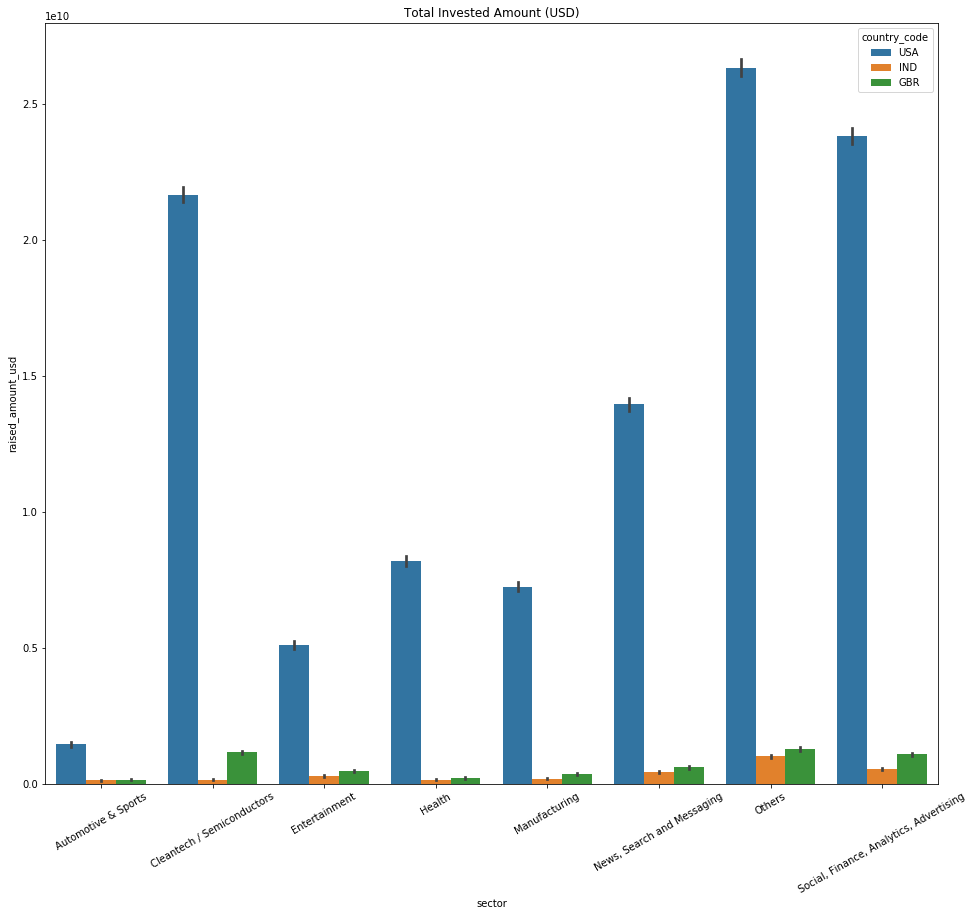

In [103]:
# plotting sector-wise count and sum of investments in the three countries
plt.figure(figsize=(16, 14))

#plt.subplot(2, 1, 1)
p = sns.barplot(x='sector', y='raised_amount_usd', hue='country_code', data=df, estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Total Invested Amount (USD)')

plt.show();

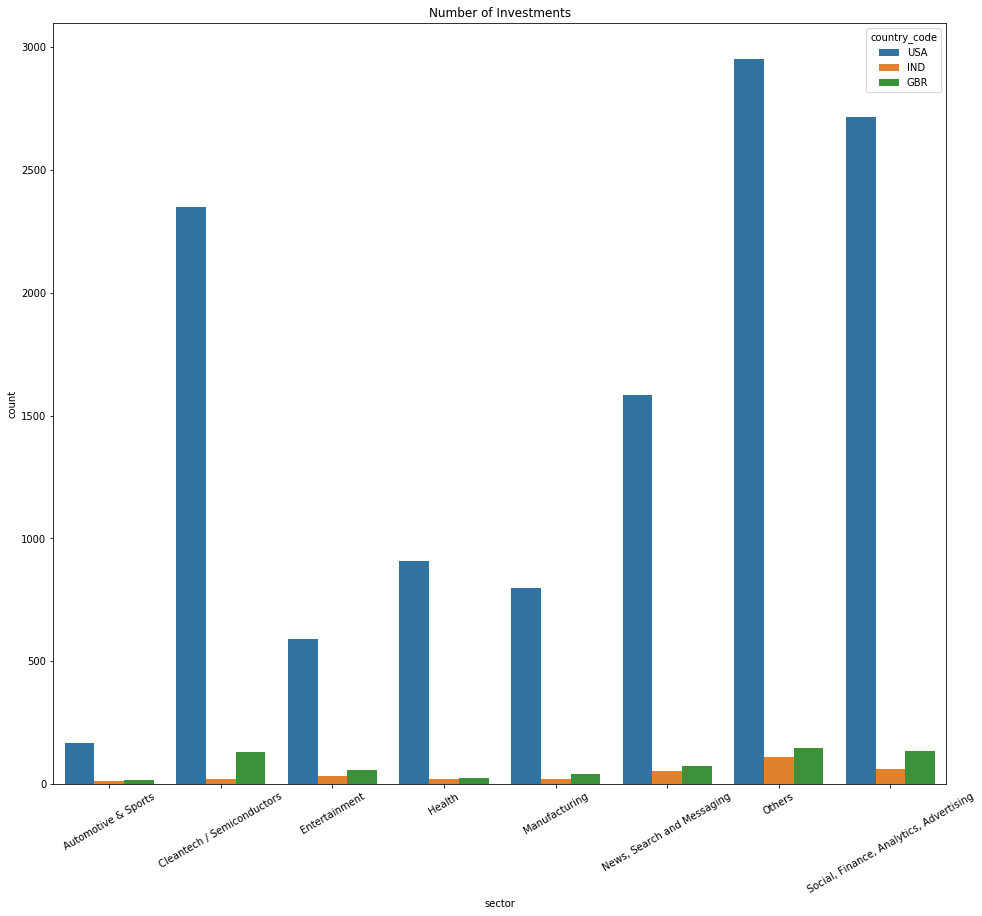

In [104]:
#plt.subplot(2, 1, 2)
plt.figure(figsize=(16, 14))
q = sns.countplot(x='sector', hue='country_code', data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Number of Investments')


plt.show();

Thus, the top country in terms of the number of investments (and the total amount invested) is the USA. The sectors 'Others', 'Social, Finance, Analytics and Advertising' and 'Cleantech/Semiconductors' are the most heavily invested ones.

In case you don't want to consider 'Others' as a sector, 'News, Search and Messaging' is the next best sector

## Remove Outliers and work with Mean value.

In [105]:
mean_df = pd.read_csv("master_df.csv", sep="," , encoding="ISO-8859-1")
mean_df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
3,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0


In [106]:
np.unique(mean_df['funding_round_type'])

array(['angel', 'convertible_note', 'debt_financing',
       'equity_crowdfunding', 'grant', 'non_equity_assistance',
       'post_ipo_debt', 'post_ipo_equity', 'private_equity',
       'product_crowdfunding', 'secondary_market', 'seed', 'undisclosed',
       'venture'], dtype=object)

In [107]:
# first, let's filter the df so it only contains the four specified funding types
mean_df = mean_df[(mean_df.funding_round_type == "venture") | 
        (mean_df.funding_round_type == "angel") | 
        (mean_df.funding_round_type == "seed") | 
        (mean_df.funding_round_type == "private_equity") ]

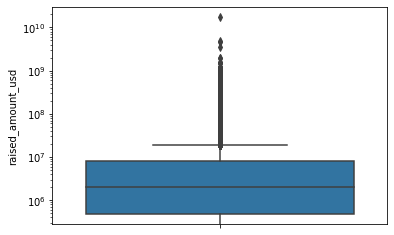

In [108]:
# distribution of raised_amount_usd
sns.boxplot(y = mean_df['raised_amount_usd'])
plt.yscale('log')
plt.show()

In [109]:
# summary metrics
mean_df['raised_amount_usd'].describe()

count    7.512400e+04
mean     9.519475e+06
std      7.792778e+07
min      0.000000e+00
25%      4.705852e+05
50%      2.000000e+06
75%      8.000000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

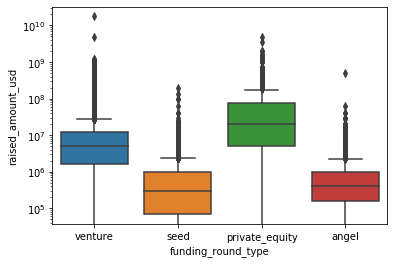

In [110]:
sns.boxplot(x = 'funding_round_type', y = 'raised_amount_usd', data = mean_df)
plt.yscale('log')
plt.show()

In [111]:
# compare the mean and median values across categories
mean_df.pivot_table(values='raised_amount_usd', columns='funding_round_type', aggfunc=[np.median, np.mean])

median                                      \
funding_round_type     angel private_equity      seed    venture   
raised_amount_usd   414906.0     20000000.0  300000.0  5000000.0   

                             mean                                              
funding_round_type          angel private_equity           seed       venture  
raised_amount_usd   971573.891136   7.393849e+07  747793.682484  1.172422e+07

#### Remove the outliers from funding_round_type and raised_amount_usd with interquantile range.Then check the mean and median

In [112]:
df_iqr = mean_df
Q1 = df_iqr.quantile(0.25)
Q3 = df_iqr.quantile(0.75)
iqr = Q3 - Q1
print(iqr)

raised_amount_usd    7529414.75
dtype: float64


In [113]:
print((df_iqr < (Q1 - 1.5*iqr)) | (df_iqr > (Q3 + 1.5*iqr)))

       category_list  country_code  funded_at  funding_round_permalink  \
0              False         False      False                    False   
1              False         False      False                    False   
2              False         False      False                    False   
4              False         False      False                    False   
5              False         False      False                    False   
6              False         False      False                    False   
7              False         False      False                    False   
8              False         False      False                    False   
9              False         False      False                    False   
10             False         False      False                    False   
11             False         False      False                    False   
12             False         False      False                    False   
14             False         False    

In [114]:
df_iqr_clean = df_iqr[~((df_iqr < (Q1 - 1.5 * iqr)) | (df_iqr > (Q3 + 1.5 * iqr))).any(axis = 1)]

In [115]:
mean_df.shape

(75124, 9)

In [116]:
df_iqr_clean.shape

(66989, 9)

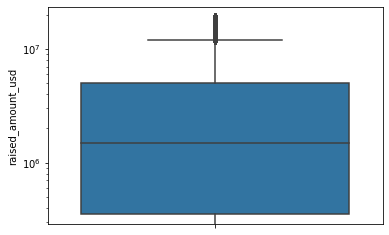

In [117]:
# Check the outliers
sns.boxplot(y = df_iqr_clean['raised_amount_usd'])
plt.yscale('log')
plt.show()

#### Still there is some outliers.But it is good enough from previous.

In [118]:
# summary metrics
df_iqr_clean['raised_amount_usd'].describe()

count    6.698900e+04
mean     3.515175e+06
std      4.371992e+06
min      0.000000e+00
25%      3.500000e+05
50%      1.500000e+06
75%      5.000000e+06
max      1.927500e+07
Name: raised_amount_usd, dtype: float64

Mean value and the median value is now double difference from each other.But we take the mean value to check the further difference.

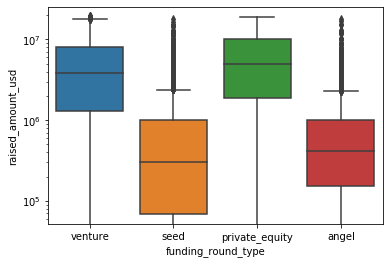

In [119]:
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data = df_iqr_clean)
plt.yscale('log')
plt.show()

In [120]:
df_iqr_clean.pivot_table(values='raised_amount_usd', columns='funding_round_type', aggfunc=[np.median, np.mean])

median                                      \
funding_round_type     angel private_equity      seed    venture   
raised_amount_usd   411186.0      5000000.0  300000.0  3850000.0   

                             mean                                              
funding_round_type          angel private_equity           seed       venture  
raised_amount_usd   786033.397903   6.185015e+06  705264.947101  5.209347e+06

In [121]:
df_iqr_clean.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
private_equity    6.185015e+06
venture           5.209347e+06
angel             7.860334e+05
seed              7.052649e+05
Name: raised_amount_usd, dtype: float64

In [122]:
df_iqr_clean.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    5000000.0
venture           3850000.0
angel              411186.0
seed               300000.0
Name: raised_amount_usd, dtype: float64

In Mean invesment amount private_equity and venture both fulfill the invesment range 6 million and 5 million.On the other hand on median invesment amount the private_equity only fill the condition but previous it was venture.

We take the both private_equity and venture and find the difference between them.

## Country Analysis with Private_equity(mean_value)

In [123]:
df = df_iqr_clean[df_iqr_clean.funding_round_type == "private_equity"]

# group by country codes and compare the total funding amounts
country_wise_total = df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
print(country_wise_total)

country_code
USA    4.174686e+09
GBR    2.069180e+08
CAN    1.800001e+08
ISR    1.595292e+08
AUS    7.537405e+07
BRA    6.657155e+07
NLD    6.610951e+07
IND    6.498205e+07
RUS    5.400000e+07
BEL    4.290343e+07
SWE    4.131906e+07
NOR    3.576705e+07
DEU    3.368461e+07
NZL    2.366869e+07
CHN    2.350000e+07
FRA    2.192159e+07
SGP    2.175513e+07
IRL    1.730000e+07
IDN    1.670000e+07
PAN    1.500000e+07
ZAF    1.350000e+07
GRC    1.169920e+07
CHE    1.114100e+07
THA    1.095586e+07
ITA    1.066606e+07
TWN    8.600000e+06
AUT    4.594850e+06
MYS    3.735967e+06
KEN    1.500000e+06
POL    1.252515e+06
ESP    1.067265e+06
EGY    1.000000e+06
JPN    8.383500e+05
TUR    3.500000e+05
DNK    3.000000e+05
EST    2.823960e+05
URY    2.800000e+05
CZE    1.600000e+05
UKR    1.280000e+05
PRT    1.250000e+05
PAK    1.000000e+05
CHL    1.000000e+05
KOR    8.527000e+04
HKG    8.000000e+04
MDA    1.416800e+04
MEX    1.000000e+04
UGA    2.000000e+03
Name: raised_amount_usd, dtype: float64


In [124]:
top_9_countries = country_wise_total[:9]
top_9_countries

country_code
USA    4.174686e+09
GBR    2.069180e+08
CAN    1.800001e+08
ISR    1.595292e+08
AUS    7.537405e+07
BRA    6.657155e+07
NLD    6.610951e+07
IND    6.498205e+07
RUS    5.400000e+07
Name: raised_amount_usd, dtype: float64

Now India is not in top 3 country.

In [125]:
# filtering for the top three countries
df = df[(df.country_code=='USA') | (df.country_code=='GBR') | (df.country_code=='CAN')]
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
14,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",Internet Marketing|Media|Public Relations,operating,USA,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,01-02-2015,6000000.0
226,/organization/2dheat,2DHeat,Clean Technology,operating,GBR,/funding-round/b1308b31d7a416eb1200b9bb42c9a08f,private_equity,24-10-2014,200708.0
397,/organization/3scale,3scale,Developer APIs|Enterprise Software|Infrastruct...,operating,USA,/funding-round/9e87c098957bd69cc8b5bb544b8cf351,private_equity,24-04-2013,4200000.0
460,/organization/4dk-technologies,4DK Technologies,Mobile,acquired,USA,/funding-round/4fcba8428540e1f34fb8af1d0393c57e,private_equity,12-12-2011,3378975.0
485,/organization/4tech,4Tech,Biotechnology,operating,USA,/funding-round/11cde5481e86cf43d357448a4abbdd67,private_equity,21-12-2011,7000000.0


In [126]:
df.shape

(713, 9)

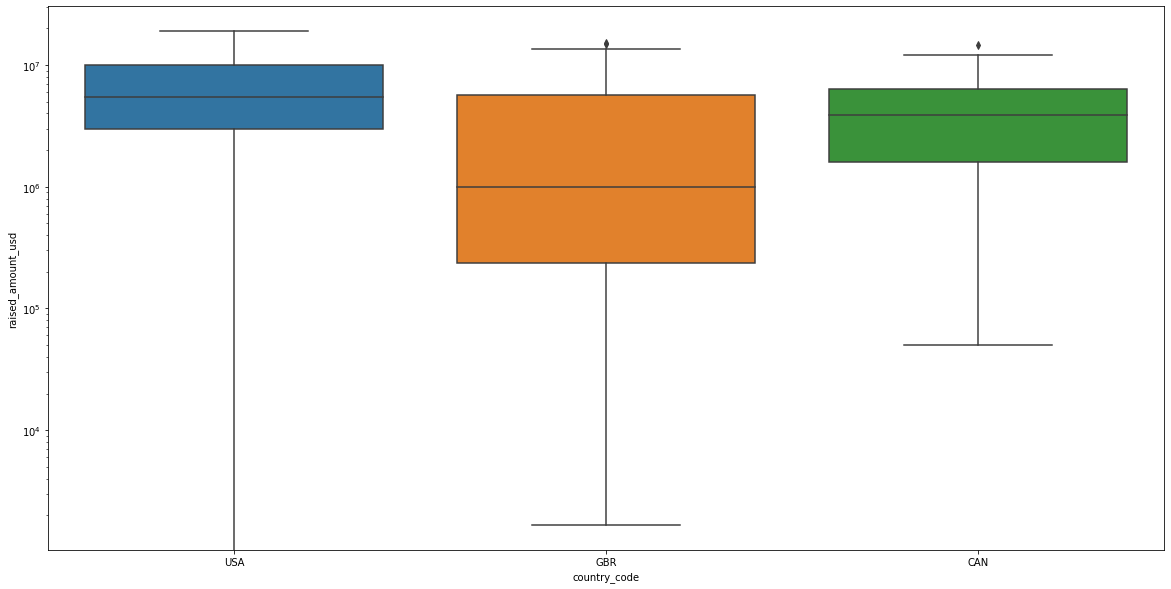

In [127]:
# boxplot to see distributions of funding amount across countries
plt.figure(figsize=(20, 10))
sns.boxplot(x='country_code', y='raised_amount_usd', data = df)
plt.yscale('log')
plt.show()

Now there is only 1/2 outlier on GBR and CAN.But previous there was huge amount of outliers remaining.

## Sector Analysis with private_equity(mean_value)

In [128]:
# extracting the main category
df.loc[:, 'main_category'] = df['category_list'].apply(lambda x: x.split("|")[0])
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
14,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",Internet Marketing|Media|Public Relations,operating,USA,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,01-02-2015,6000000.0,Internet Marketing
226,/organization/2dheat,2DHeat,Clean Technology,operating,GBR,/funding-round/b1308b31d7a416eb1200b9bb42c9a08f,private_equity,24-10-2014,200708.0,Clean Technology
397,/organization/3scale,3scale,Developer APIs|Enterprise Software|Infrastruct...,operating,USA,/funding-round/9e87c098957bd69cc8b5bb544b8cf351,private_equity,24-04-2013,4200000.0,Developer APIs
460,/organization/4dk-technologies,4DK Technologies,Mobile,acquired,USA,/funding-round/4fcba8428540e1f34fb8af1d0393c57e,private_equity,12-12-2011,3378975.0,Mobile
485,/organization/4tech,4Tech,Biotechnology,operating,USA,/funding-round/11cde5481e86cf43d357448a4abbdd67,private_equity,21-12-2011,7000000.0,Biotechnology


In [129]:
# drop the category_list column
df = df.drop('category_list', axis=1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
14,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",operating,USA,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,01-02-2015,6000000.0,Internet Marketing
226,/organization/2dheat,2DHeat,operating,GBR,/funding-round/b1308b31d7a416eb1200b9bb42c9a08f,private_equity,24-10-2014,200708.0,Clean Technology
397,/organization/3scale,3scale,operating,USA,/funding-round/9e87c098957bd69cc8b5bb544b8cf351,private_equity,24-04-2013,4200000.0,Developer APIs
460,/organization/4dk-technologies,4DK Technologies,acquired,USA,/funding-round/4fcba8428540e1f34fb8af1d0393c57e,private_equity,12-12-2011,3378975.0,Mobile
485,/organization/4tech,4Tech,operating,USA,/funding-round/11cde5481e86cf43d357448a4abbdd67,private_equity,21-12-2011,7000000.0,Biotechnology


In [130]:
mapping = pd.read_csv("mapping.csv", sep=",")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [131]:
# remove the row with missing values
mapping = mapping[~pd.isnull(mapping['category_list'])]
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [132]:
mapping['category_list'] = mapping['category_list'].str.lower()
df['main_category'] = df['main_category'].str.lower()

In [133]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,0,1,0,0,0,0


In [134]:
df[~df['main_category'].isin(mapping['category_list'])]

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
1507,/organization/activepath,ActivePath,operating,USA,/funding-round/fe5e517f4c2dba0f5d373fb796fc4958,private_equity,30-11-2012,3250001.0,finance
5000,/organization/app55,App55 Ltd,closed,GBR,/funding-round/15da45e41a94a0a0beffd61618c46258,private_equity,21-05-2012,1700000.0,finance technology
7719,/organization/ayasdi,Ayasdi,operating,USA,/funding-round/b2bbc1ff69f64865f06369fcd4660f63,private_equity,01-04-2012,10067000.0,analytics
8126,/organization/bank-of-georgetown,Bank of Georgetown,operating,USA,/funding-round/4af0bb3c5dcf2184d1e9f5694f939c2f,private_equity,04-12-2013,18000000.0,finance
8278,/organization/basis-technology,Basis Technology,operating,USA,/funding-round/fd1dadf216059558ff590c3ac840c951,private_equity,10-04-2001,7500000.0,analytics
10540,/organization/blue-ridge,Blue Ridge,operating,USA,/funding-round/a39dd02f599c38982ad8815bbfd211a7,private_equity,10-11-2014,6000000.0,analytics
11892,/organization/brighttax,Bright!Tax,operating,USA,/funding-round/7da76a13e993f05a42d84f168a4ba06e,private_equity,05-08-2013,50000.0,finance
13131,/organization/capital-bancorp,Capital Bancorp,operating,USA,/funding-round/356c07f553b306a343d4318c13a3c5e9,private_equity,08-07-2013,3400000.0,finance
13226,/organization/car-loan-4u,Car Loan 4U,operating,GBR,/funding-round/96f7aa642bd39a83753f12693b2d1830,private_equity,05-02-2014,13051777.0,finance
13708,/organization/carta-worldwide,Carta Worldwide,operating,CAN,/funding-round/313765c052f7f5f0f6a919b4fb56450f,private_equity,30-09-2013,2000000.0,finance


In [135]:
# values in the category_list column which are not in main_category column 
mapping[~mapping['category_list'].isin(df['main_category'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
5,active lifestyle,0,0,0,0,1,0,0,0,0
7,advanced materials,0,0,0,0,0,1,0,0,0
8,adventure travel,1,0,0,0,0,0,0,0,0
10,advertising exchanges,0,0,0,0,0,0,0,0,1
11,advertising networks,0,0,0,0,0,0,0,0,1
13,advice,0,0,0,0,0,0,0,1,0
14,aerospace,1,0,0,0,0,0,0,0,0


In [136]:
# replacing '0' with 'na'
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0', 'na'))
print(mapping['category_list'])

1                                      3d
2                             3d printing
3                           3d technology
4                              accounting
5                        active lifestyle
6                            ad targeting
7                      advanced materials
8                        adventure travel
9                             advertising
10                  advertising exchanges
11                   advertising networks
12                  advertising platforms
13                                 advice
14                              aerospace
15                            agriculture
16                  air pollution control
17                             algorithms
18                            all markets
19                           all students
20                   alternative medicine
21                                 alumni
22                              analytics
23                                android
24                                

In [137]:
df = pd.merge(df, mapping, how='inner', left_on='main_category', right_on='category_list')
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",operating,USA,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,01-02-2015,6000000.0,internet marketing,internet marketing,0,0,0,0,0,0,0,0,1
1,/organization/2dheat,2DHeat,operating,GBR,/funding-round/b1308b31d7a416eb1200b9bb42c9a08f,private_equity,24-10-2014,200708.0,clean technology,clean technology,0,0,1,0,0,0,0,0,0
2,/organization/acoustic-sensing-technology,Acoustic Sensing Technology,operating,GBR,/funding-round/3977885a131f716eeaab089b1338553b,private_equity,09-03-2013,976865.0,clean technology,clean technology,0,0,1,0,0,0,0,0,0
3,/organization/algae-international-group,Algae International Group,operating,USA,/funding-round/fa8f55fb48f3f8fdd6274f02a0e8d3ef,private_equity,23-07-2013,5000000.0,clean technology,clean technology,0,0,1,0,0,0,0,0,0
4,/organization/antares-energy,Antares Energy,operating,USA,/funding-round/d737e292d59c34e397ebf4e93fd53793,private_equity,07-10-2013,10000000.0,clean technology,clean technology,0,0,1,0,0,0,0,0,0


In [138]:
df = df.drop('category_list', axis=1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",operating,USA,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,01-02-2015,6000000.0,internet marketing,0,0,0,0,0,0,0,0,1
1,/organization/2dheat,2DHeat,operating,GBR,/funding-round/b1308b31d7a416eb1200b9bb42c9a08f,private_equity,24-10-2014,200708.0,clean technology,0,0,1,0,0,0,0,0,0
2,/organization/acoustic-sensing-technology,Acoustic Sensing Technology,operating,GBR,/funding-round/3977885a131f716eeaab089b1338553b,private_equity,09-03-2013,976865.0,clean technology,0,0,1,0,0,0,0,0,0
3,/organization/algae-international-group,Algae International Group,operating,USA,/funding-round/fa8f55fb48f3f8fdd6274f02a0e8d3ef,private_equity,23-07-2013,5000000.0,clean technology,0,0,1,0,0,0,0,0,0
4,/organization/antares-energy,Antares Energy,operating,USA,/funding-round/d737e292d59c34e397ebf4e93fd53793,private_equity,07-10-2013,10000000.0,clean technology,0,0,1,0,0,0,0,0,0


In [139]:
value_vars = df.columns[9:18]
id_vars = np.setdiff1d(df.columns, value_vars)

print(value_vars, "\n")
print(id_vars)

Index(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object') 

['country_code' 'funded_at' 'funding_round_permalink' 'funding_round_type'
 'main_category' 'name' 'permalink' 'raised_amount_usd' 'status']


In [140]:
long_df = pd.melt(df, 
        id_vars=list(id_vars), 
        value_vars=list(value_vars))

long_df.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,permalink,raised_amount_usd,status,variable,value
0,USA,01-02-2015,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,internet marketing,"1-800-PublicRelations, Inc.",/organization/1-800-publicrelations-inc-,6000000.0,operating,Automotive & Sports,0
1,GBR,24-10-2014,/funding-round/b1308b31d7a416eb1200b9bb42c9a08f,private_equity,clean technology,2DHeat,/organization/2dheat,200708.0,operating,Automotive & Sports,0
2,GBR,09-03-2013,/funding-round/3977885a131f716eeaab089b1338553b,private_equity,clean technology,Acoustic Sensing Technology,/organization/acoustic-sensing-technology,976865.0,operating,Automotive & Sports,0
3,USA,23-07-2013,/funding-round/fa8f55fb48f3f8fdd6274f02a0e8d3ef,private_equity,clean technology,Algae International Group,/organization/algae-international-group,5000000.0,operating,Automotive & Sports,0
4,USA,07-10-2013,/funding-round/d737e292d59c34e397ebf4e93fd53793,private_equity,clean technology,Antares Energy,/organization/antares-energy,10000000.0,operating,Automotive & Sports,0


In [141]:
long_df = long_df[long_df['value']==1]
long_df = long_df.drop('value', axis=1)

In [142]:
long_df.head()
len(long_df)

712

In [143]:
long_df = long_df.rename(columns={'variable': 'sector'})
long_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 516 to 6406
Data columns (total 10 columns):
country_code               712 non-null object
funded_at                  712 non-null object
funding_round_permalink    712 non-null object
funding_round_type         712 non-null object
main_category              712 non-null object
name                       712 non-null object
permalink                  712 non-null object
raised_amount_usd          712 non-null float64
status                     712 non-null object
sector                     712 non-null object
dtypes: float64(1), object(9)
memory usage: 61.2+ KB


In [144]:
long_df.shape

(712, 10)

In [145]:
df = long_df[(long_df['raised_amount_usd'] >= 5000000) & (long_df['raised_amount_usd'] <= 15000000)]

In [146]:
df.groupby(['country_code', 'sector']).raised_amount_usd.agg(['count', 'sum'])

count          sum
country_code sector                                                     
CAN          Cleantech / Semiconductors                   9   85376044.0
             Entertainment                                1   10250000.0
             Manufacturing                                2   12000000.0
             Others                                       1    5100000.0
             Social, Finance, Analytics, Advertising      1    6318183.0
GBR          Automotive & Sports                          1    6061005.0
             Cleantech / Semiconductors                   2   19446213.0
             Entertainment                                1   13637262.0
             Manufacturing                                2   24879637.0
             News, Search and Messaging                   2   15568600.0
             Others                                       2   21000000.0
             Social, Finance, Analytics, Advertising      4   46992419.0
USA          Automotive & Sports                          6   53917495.0
             Cleantech / Semiconductors                 103  994467656.0
             Entertainment                                7   63290000.0
             Health                                      34  314010178.0
             Manufacturing                               16  155466681.0
             News, Search and Messaging                  31  256053376.0
             Others                                      61  570729139.0
             Social, Finance, Analytics, Advertising     54  470210339.0

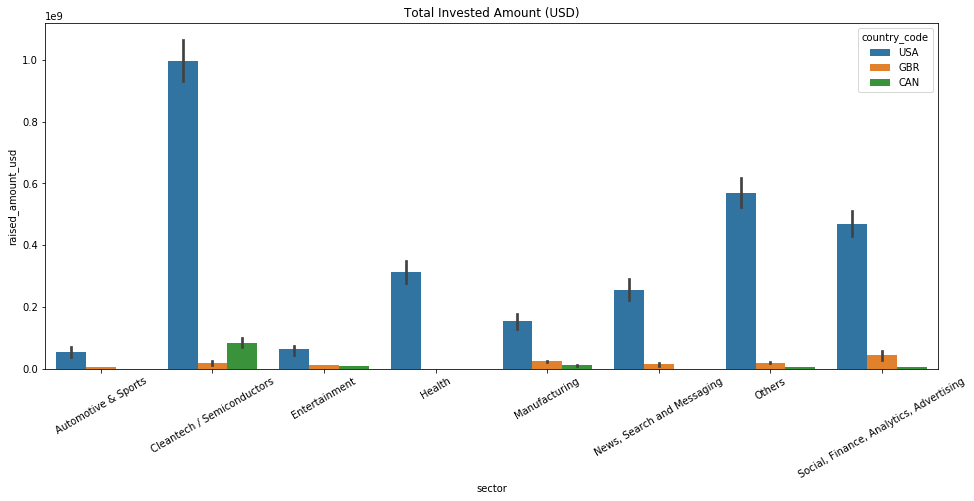

In [148]:
plt.figure(figsize=(16, 14))

plt.subplot(2, 1, 1)
p = sns.barplot(x='sector', y='raised_amount_usd', hue='country_code', data=df, estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Total Invested Amount (USD)')

plt.show();

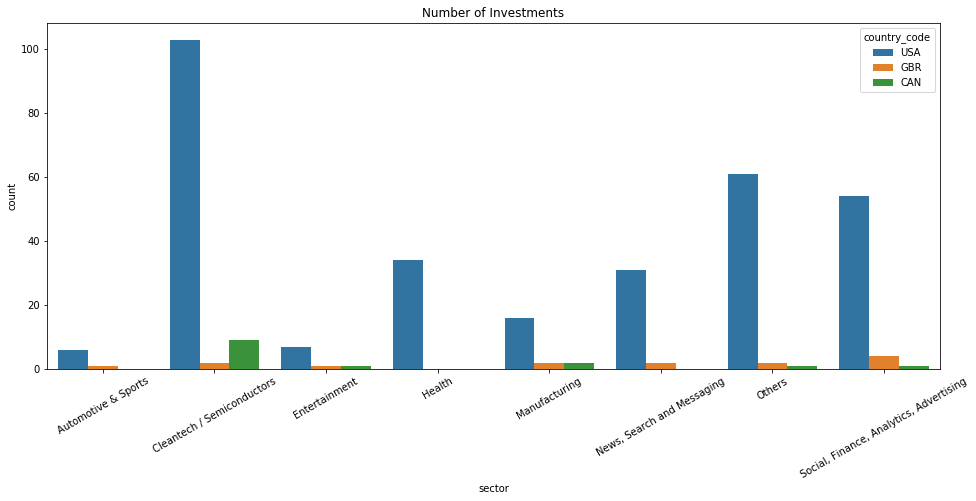

In [149]:
plt.figure(figsize=(16, 14))
plt.subplot(2, 1, 2)
q = sns.countplot(x='sector', hue='country_code', data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Number of Investments')

plt.show()

## Country Analysis with venture(mean_value)

In [150]:
df_iqr_clean.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
private_equity    6.185015e+06
venture           5.209347e+06
angel             7.860334e+05
seed              7.052649e+05
Name: raised_amount_usd, dtype: float64

In [151]:
df = df_iqr_clean[df_iqr_clean.funding_round_type == "venture"]

# group by country codes and compare the total funding amounts
country_wise_total = df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
print(country_wise_total)

country_code
USA    1.603499e+11
GBR    8.864231e+09
CHN    6.981312e+09
CAN    5.442824e+09
IND    4.152104e+09
ISR    4.131300e+09
FRA    3.952327e+09
DEU    2.733898e+09
SWE    1.122043e+09
CHE    1.105293e+09
JPN    1.075351e+09
SGP    9.509244e+08
ESP    9.437274e+08
IRL    9.085832e+08
NLD    8.606206e+08
AUS    8.087262e+08
RUS    6.774260e+08
FIN    6.185020e+08
BEL    5.736924e+08
KOR    5.588761e+08
BRA    5.087036e+08
DNK    4.912700e+08
ITA    3.790504e+08
NOR    3.631323e+08
HKG    3.449791e+08
TUR    2.632701e+08
AUT    1.959822e+08
NZL    1.923164e+08
ARG    1.743388e+08
TWN    1.388054e+08
           ...     
LIE    1.309172e+07
MNE    1.220000e+07
SVN    1.201751e+07
BGR    1.130000e+07
KAZ    1.100000e+07
GRC    1.074378e+07
BAH    8.900000e+06
TTO    8.500000e+06
SVK    8.241062e+06
LTU    7.210880e+06
BGD    7.002000e+06
LBN    6.455000e+06
GGY    3.960000e+06
TUN    3.920000e+06
SEN    2.860000e+06
HRV    2.633669e+06
UGA    2.500000e+06
PER    2.469270e+06
BWA    

In [152]:
top_9_countries = country_wise_total[:9]
top_9_countries

country_code
USA    1.603499e+11
GBR    8.864231e+09
CHN    6.981312e+09
CAN    5.442824e+09
IND    4.152104e+09
ISR    4.131300e+09
FRA    3.952327e+09
DEU    2.733898e+09
SWE    1.122043e+09
Name: raised_amount_usd, dtype: float64

In [153]:
df = df[(df.country_code=='USA') | (df.country_code=='GBR') | (df.country_code=='CAN')]
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0
21,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0


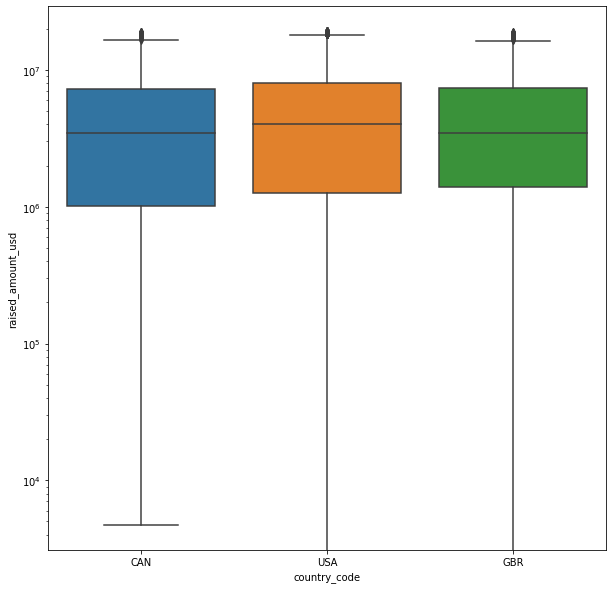

In [154]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='country_code', y='raised_amount_usd', data = df)
plt.yscale('log')
plt.show()

## Sector Analysis venture(mean_value)

In [155]:
df.loc[:, 'main_category'] = df['category_list'].apply(lambda x: x.split("|")[0])
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Biotechnology
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps
21,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,Education


In [156]:
df = df.drop('category_list', axis=1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Biotechnology
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
15,/organization/1-mainstream,1 Mainstream,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps
21,/organization/10-minutes-with,10 Minutes With,operating,GBR,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,Education


In [157]:
mapping = pd.read_csv("mapping.csv", sep=",")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [158]:
mapping = mapping[~pd.isnull(mapping['category_list'])]
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [159]:
# converting common columns to lowercase
mapping['category_list'] = mapping['category_list'].str.lower()
df['main_category'] = df['main_category'].str.lower()

In [160]:
mapping['category_list']

1                                      3d
2                             3d printing
3                           3d technology
4                              accounting
5                        active lifestyle
6                            ad targeting
7                      advanced materials
8                        adventure travel
9                             advertising
10                  advertising exchanges
11                   advertising networks
12                  advertising platforms
13                                 advice
14                              aerospace
15                            agriculture
16                  air pollution control
17                             algorithms
18                            all markets
19                           all students
20                    alter0tive medicine
21                                 alumni
22                               a0lytics
23                                android
24                                

In [161]:
df[~df['main_category'].isin(mapping['category_list'])]

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics
47,/organization/100plus,100Plus,acquired,USA,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.0,analytics
136,/organization/1world-online,1World Online,operating,USA,/funding-round/32936e588a134502712877150198a0b3,venture,13-08-2015,2500000.0,analytics
137,/organization/1world-online,1World Online,operating,USA,/funding-round/4e30bd5c85d8163239a3479ec979647a,venture,01-12-2013,500000.0,analytics
138,/organization/1world-online,1World Online,operating,USA,/funding-round/a349bfd7a8d48cfc8b9fdb79480dea7f,venture,02-07-2013,1000000.0,analytics
187,/organization/24-7-card,24/7 Card,closed,USA,/funding-round/0c38194ff2035185c96155dfad18f3bd,venture,21-12-2011,3452941.0,finance
590,/organization/6th-wave-innovations-corporation,6th Wave Innovations Corporation,operating,USA,/funding-round/75d128ac40f9e541a1a11786a47c2952,venture,08-07-2015,2569720.0,nanotechnology
597,/organization/7-billion-people,7 Billion People,closed,USA,/funding-round/58959ed2be7b14abd6beeb20c9eb17ca,venture,13-07-2012,2368902.0,analytics
629,/organization/7park-data,7Park Data,operating,USA,/funding-round/64ddc56c450048911859956eade79cfa,venture,26-08-2015,3000000.0,analytics


In [162]:
mapping[~mapping['category_list'].isin(df['main_category'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
59,big data a0lytics,0,0,0,0,0,0,0,0,1
64,biomass power generation,0,0,1,0,0,0,0,0,0
69,boating industry,1,0,0,0,0,0,0,0,0
77,building owners,0,0,0,0,0,0,1,0,0
79,business a0lytics,0,0,0,0,0,0,0,0,1


In [163]:
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0', 'na'))
print(mapping['category_list'])

1                                      3d
2                             3d printing
3                           3d technology
4                              accounting
5                        active lifestyle
6                            ad targeting
7                      advanced materials
8                        adventure travel
9                             advertising
10                  advertising exchanges
11                   advertising networks
12                  advertising platforms
13                                 advice
14                              aerospace
15                            agriculture
16                  air pollution control
17                             algorithms
18                            all markets
19                           all students
20                   alternative medicine
21                                 alumni
22                              analytics
23                                android
24                                

In [164]:
df = pd.merge(df, mapping, how='inner', left_on='main_category', right_on='category_list')
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,biotechnology,biotechnology,0,0,1,0,0,0,0,0,0
1,/organization/10x-technologies,10X Technologies,operating,USA,/funding-round/39c1441d5098875a925577d0f2ad3904,venture,12-01-2015,550000.0,biotechnology,biotechnology,0,0,1,0,0,0,0,0,0
2,/organization/20-20-gene-systems-inc,20/20 Gene Systems Inc.,operating,USA,/funding-round/1df118940a2af3f77ec91a53c2c2ca79,venture,23-09-2015,2037014.0,biotechnology,biotechnology,0,0,1,0,0,0,0,0,0
3,/organization/20-20-gene-systems-inc,20/20 Gene Systems Inc.,operating,USA,/funding-round/63f491aa5ca433cdd7e7e75b208b2fab,venture,25-09-2012,150000.0,biotechnology,biotechnology,0,0,1,0,0,0,0,0,0
4,/organization/20-20-gene-systems-inc,20/20 Gene Systems Inc.,operating,USA,/funding-round/e8f0f6679abd451e58a78cdbf26f6acd,venture,30-10-2015,2158413.0,biotechnology,biotechnology,0,0,1,0,0,0,0,0,0


In [165]:
df = df.drop('category_list', axis=1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,biotechnology,0,0,1,0,0,0,0,0,0
1,/organization/10x-technologies,10X Technologies,operating,USA,/funding-round/39c1441d5098875a925577d0f2ad3904,venture,12-01-2015,550000.0,biotechnology,0,0,1,0,0,0,0,0,0
2,/organization/20-20-gene-systems-inc,20/20 Gene Systems Inc.,operating,USA,/funding-round/1df118940a2af3f77ec91a53c2c2ca79,venture,23-09-2015,2037014.0,biotechnology,0,0,1,0,0,0,0,0,0
3,/organization/20-20-gene-systems-inc,20/20 Gene Systems Inc.,operating,USA,/funding-round/63f491aa5ca433cdd7e7e75b208b2fab,venture,25-09-2012,150000.0,biotechnology,0,0,1,0,0,0,0,0,0
4,/organization/20-20-gene-systems-inc,20/20 Gene Systems Inc.,operating,USA,/funding-round/e8f0f6679abd451e58a78cdbf26f6acd,venture,30-10-2015,2158413.0,biotechnology,0,0,1,0,0,0,0,0,0


In [166]:
value_vars = df.columns[9:18]
id_vars = np.setdiff1d(df.columns, value_vars)

print(value_vars, "\n")
print(id_vars)

Index(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object') 

['country_code' 'funded_at' 'funding_round_permalink' 'funding_round_type'
 'main_category' 'name' 'permalink' 'raised_amount_usd' 'status']


In [167]:
long_df = pd.melt(df, 
        id_vars=list(id_vars), 
        value_vars=list(value_vars))

long_df.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,permalink,raised_amount_usd,status,variable,value
0,CAN,21-12-2009,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,biotechnology,Ondine Biomedical Inc.,/organization/0ndine-biomedical-inc,719491.0,operating,Automotive & Sports,0
1,USA,12-01-2015,/funding-round/39c1441d5098875a925577d0f2ad3904,venture,biotechnology,10X Technologies,/organization/10x-technologies,550000.0,operating,Automotive & Sports,0
2,USA,23-09-2015,/funding-round/1df118940a2af3f77ec91a53c2c2ca79,venture,biotechnology,20/20 Gene Systems Inc.,/organization/20-20-gene-systems-inc,2037014.0,operating,Automotive & Sports,0
3,USA,25-09-2012,/funding-round/63f491aa5ca433cdd7e7e75b208b2fab,venture,biotechnology,20/20 Gene Systems Inc.,/organization/20-20-gene-systems-inc,150000.0,operating,Automotive & Sports,0
4,USA,30-10-2015,/funding-round/e8f0f6679abd451e58a78cdbf26f6acd,venture,biotechnology,20/20 Gene Systems Inc.,/organization/20-20-gene-systems-inc,2158413.0,operating,Automotive & Sports,0


In [168]:
long_df = long_df[long_df['value']==1]
long_df = long_df.drop('value', axis=1)

long_df.head()
len(long_df)

33374

In [169]:
long_df = long_df.rename(columns={'variable': 'sector'})

In [170]:
df = long_df[(long_df['raised_amount_usd'] >= 5000000) & (long_df['raised_amount_usd'] <= 15000000)]

df.groupby(['country_code', 'sector']).raised_amount_usd.agg(['count', 'sum'])

count           sum
country_code sector                                                      
CAN          Automotive & Sports                          2  1.500000e+07
             Cleantech / Semiconductors                 112  1.015888e+09
             Entertainment                               23  1.600221e+08
             Health                                      21  1.683451e+08
             Manufacturing                               31  2.376331e+08
             News, Search and Messaging                  46  4.201211e+08
             Others                                     109  9.261380e+08
             Social, Finance, Analytics, Advertising     78  6.561431e+08
GBR          Automotive & Sports                         16  1.670516e+08
             Cleantech / Semiconductors                 130  1.163990e+09
             Entertainment                               56  4.827847e+08
             Health                                      24  2.145375e+08
             Manufacturing                               42  3.619403e+08
             News, Search and Messaging                  73  6.157462e+08
             Others                                     147  1.283624e+09
             Social, Finance, Analytics, Advertising    133  1.089404e+09
USA          Automotive & Sports                        167  1.454104e+09
             Cleantech / Semiconductors                2350  2.163343e+10
             Entertainment                              591  5.099198e+09
             Health                                     909  8.211859e+09
             Manufacturing                              799  7.258553e+09
             News, Search and Messaging                1583  1.397157e+10
             Others                                    2950  2.632101e+10
             Social, Finance, Analytics, Advertising   2714  2.380738e+10

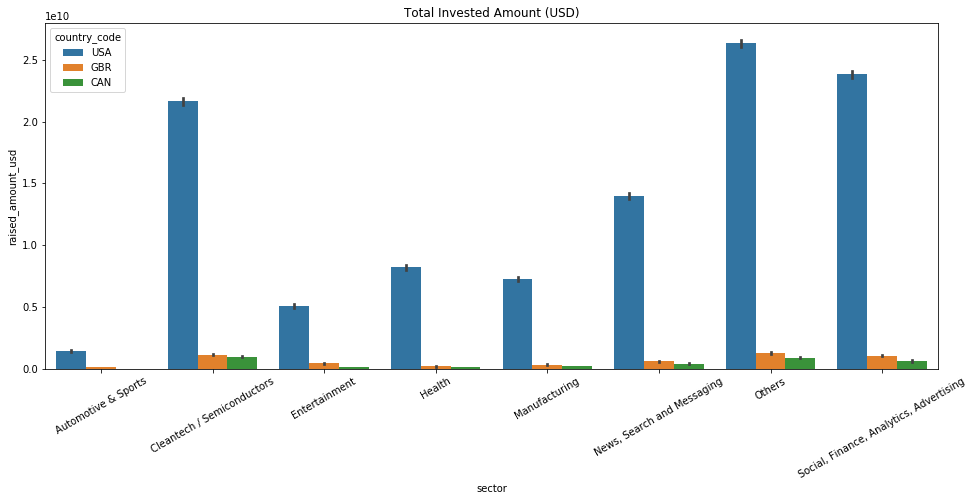

In [172]:
plt.figure(figsize=(16, 14))

plt.subplot(2, 1, 1)
p = sns.barplot(x='sector', y='raised_amount_usd', hue='country_code', data=df, estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Total Invested Amount (USD)')

plt.show();

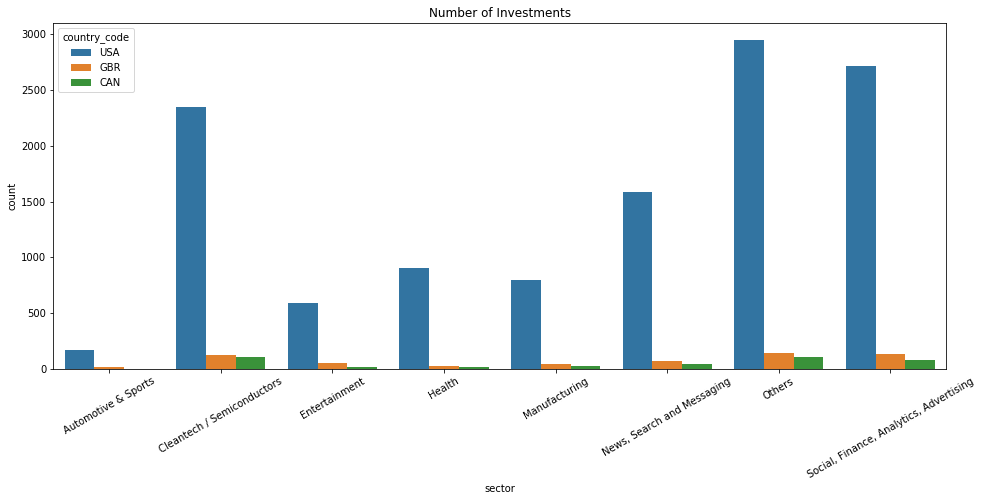

In [173]:
plt.figure(figsize=(16, 14))
plt.subplot(2, 1, 2)
q = sns.countplot(x='sector', hue='country_code', data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Number of Investments')


plt.show();

### Conclusion

Thus it is clear that USA is the top most invesment country all over the world.In every sector USA is higher than other 2 country Canada and Great-Britain.
The graph vary from invesment type.In venture type Socian , finance , Analytics and Advertisement is higher than other(not consider ```others```).But in private_equity cleantech and semicanductors are highers than other secotrs.